In [1]:
# all the imports
import os
import tempfile
from subprocess import call
import scipy
import numpy as np
import matplotlib.pyplot as plt
from pims import ImageSequence
import zipfile
from skxray.core import dpc
%matplotlib notebook

dpc.logger.setLevel(dpc.logging.DEBUG)

In [2]:
# some helper functions
def load_image(filename):
    """
    Load an image

    Parameters
    ----------
    filename : string
        the location and name of an image

    Return
    ----------
    t : 2-D numpy array
        store the image data

    """

    if os.path.exists(filename):
        t = plt.imread(filename)

    else:
        print('Please download and decompress the test data to your home directory\n\
               Google drive link, https://drive.google.com/file/d/0B3v6W1bQwN_AVjdYdERHUDBsMmM/edit?usp=sharing\n\
               Dropbox link, https://www.dropbox.com/s/963c4ymfmbjg5dm/SOFC.zip')
        raise Exception('File not found: %s' % filename)

    return t


def unzip(source_filename, path=None, verbose=True):
    with zipfile.ZipFile(source_filename) as zf:
        num = len(zf.infolist())
        for idx, member in enumerate(zf.infolist()):
            if verbose and idx % (num//100) == 0:
                print("{:3d}% Extracting {}/{}".format(
                      int(idx/num*100), idx+1, len(zf.infolist())))
            zf.extract(member, path)

In [3]:
# ONLY RUN THIS CELL ONCE, PLEASE! If you need to reset the notebook, 
# set the `download_folder` variable to the output of this cell...
download_folder = tempfile.mkdtemp()
print(download_folder)
# download_folder = '/tmp/tmp_hg8ajb9'

In [4]:
# Download and unzip the data file to a temporary location
dpc_zip_file = os.path.join(download_folder, 'SOFC.zip')
dpc_zip_folder = os.path.join(download_folder, 'SOFC')

zip_downloaded = True
zip_extracted = True
# check to see if the zip file has already been downloaded
if not os.path.exists(download_folder + '/SOFC.zip'):
    print('Zip file has not been downloaded')
    zip_downloaded = False
else:
    print("Zip file has already been downloaded to %s" % dpc_zip_file)

# see if the zip has been extracted already
if not os.path.exists(download_folder + '/SOFC'):
    print('Zip file has not been extracted')
    zip_extracted = False
else:
    print("Zip file has already been extracted to %s." % dpc_zip_folder)

if not zip_extracted:
    if not zip_downloaded:
        print('Downloading zip file')
        # only download the data again if the zip file is not present
        sofc_file = os.path.join(download_folder, 'SOFC.zip')
        print('The required test data directory was not found.'
              '\nDownloading the test data to %s' % dpc_zip_file)
        # todo make this not print every fraction of a second
        call(('wget https://www.dropbox.com/s/963c4ymfmbjg5dm/SOFC.zip -P %s' %
              download_folder),
             shell=True)
    # unzip it into this directory
    print('Unzipping data')
    unzip(dpc_zip_file, download_folder)

Zip file has already been downloaded to /tmp/tmp_hg8ajb9/SOFC.zip
Zip file has already been extracted to /tmp/tmp_hg8ajb9/SOFC.


In [5]:
# Set parameters
start_point = [1, 0]
first_image = 1
pixel_size = (55, 55)
focus_to_det = 1.46e6
scan_xstep = 0.1
scan_ystep = 0.1
scan_rows = 121
scan_cols = 121
energy = 19.5
roi = None
padding = 0
weighting = 1.
bad_pixels = None
solver = 'Nelder-Mead'
images = ImageSequence(dpc_zip_folder + "/*.tif")
img_size = images[0].shape
ref_image = np.ones(img_size)
scale = True
negate = True

In [6]:
# Use skxray.dpc.dpc_runner
phase, amplitude = dpc.dpc_runner(
    ref_image, images, start_point, pixel_size, focus_to_det, scan_rows,
    scan_cols, scan_xstep, scan_ystep, energy, padding, weighting, solver,
    roi, bad_pixels, negate, scale)

DEBUG:skxray.core.dpc:dpc 0% complete
DEBUG:skxray.core.dpc:dpc 1% complete
DEBUG:skxray.core.dpc:dpc 2% complete
DEBUG:skxray.core.dpc:dpc 3% complete
DEBUG:skxray.core.dpc:dpc 4% complete
DEBUG:skxray.core.dpc:dpc 5% complete
DEBUG:skxray.core.dpc:dpc 6% complete
DEBUG:skxray.core.dpc:dpc 7% complete
DEBUG:skxray.core.dpc:dpc 8% complete
DEBUG:skxray.core.dpc:dpc 9% complete
DEBUG:skxray.core.dpc:dpc 10% complete
DEBUG:skxray.core.dpc:dpc 11% complete
DEBUG:skxray.core.dpc:dpc 12% complete
DEBUG:skxray.core.dpc:dpc 13% complete
DEBUG:skxray.core.dpc:dpc 14% complete
DEBUG:skxray.core.dpc:dpc 15% complete
DEBUG:skxray.core.dpc:dpc 16% complete
DEBUG:skxray.core.dpc:dpc 17% complete
DEBUG:skxray.core.dpc:dpc 18% complete
DEBUG:skxray.core.dpc:dpc 19% complete
DEBUG:skxray.core.dpc:dpc 20% complete
DEBUG:skxray.core.dpc:dpc 21% complete
DEBUG:skxray.core.dpc:dpc 22% complete
DEBUG:skxray.core.dpc:dpc 23% complete
DEBUG:skxray.core.dpc:dpc 24% complete
DEBUG:skxray.core.dpc:dpc 25% compl

<IPython.core.display.Javascript object>


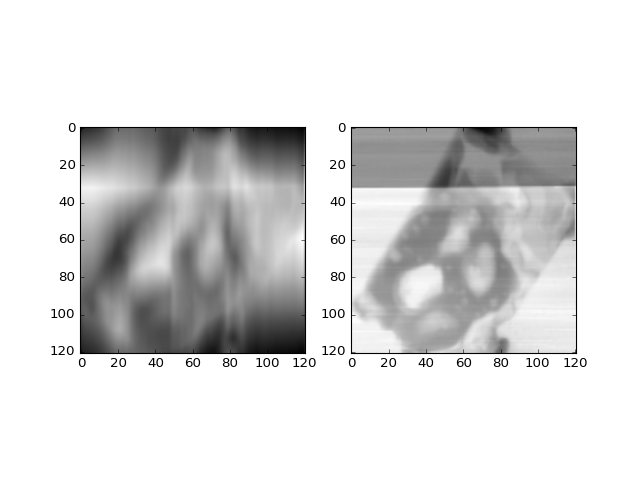

In [7]:
# display results
fig, ax = plt.subplots(ncols=2)
ax[0].imshow(phase, cmap='gray')
ax[1].imshow(amplitude, cmap='gray')